# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot. 

 What can be said about the three outliers in the upper left corner of the graph?

 Is their first principal component score high or low?  What about their second principal component score? 

 What does that mean about their values in series_1, series_2, and series_3? 

 It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that? 
 
 How are series_1 and series_2 related, according to how they were created?  
 
 If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

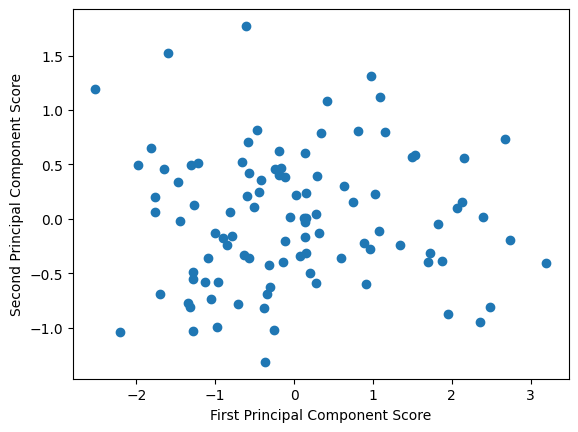

In [13]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# Principal Component Analysis (PCA) Analysis

### 📌 **Question 1:** What about the three outliers in the upper left corner of the graph?

The three outliers in the upper left corner have:
- **Low First Principal Component Score (PC1):** This means they have low values in `series_3` because PC1 is mostly made up of `series_3` (biggest number in the components).
- **Low Second Principal Component Score (PC2):** This means they have low combined values of `series_1` and `series_2` because PC2 is a mix of both `series_1` and `series_2`.

### 📌 **Question 2:** What does that mean about their values in `series_1`, `series_2`, and `series_3`?
- **`series_3`:** They have low values here (we know this because PC1 is mostly `series_3`).
- **`series_1` and `series_2`:** They likely have low values, but we can't say much about how they compare to each other.

### 📌 **Question 3:** Why is it hard to say anything about `series_1` and `series_2`?
- **Correlation:** `series_1` and `series_2` are related. `series_2` is just `series_1` with some noise added. So, they're similar but not perfectly the same.
- **Component Loadings:** PC1 and PC2 have similar values for `series_1` and `series_2`, making it hard to separate them.

### 📌 **Question 4:** How are `series_1` and `series_2` related?
- `series_2` was made by multiplying `series_1` with some random noise. They’re positively related but not identical.

### 📌 **Question 5:** What do we see in the pairplot for all three series?
- `series_1` and `series_2` are very similar and form a straight-line pattern.
- `series_3` is more spread out and messy because of more noise added during its creation.

### 📌 **Advantages of the Graph:**
- Shows most of the variation in the data with just two components.
- Makes it easy to spot outliers.
- Summarizes the data well.

### 📌 **Disadvantages of the Graph:**
- Doesn’t clearly show the relationship between `series_1` and `series_2`.
- Loses some information about `series_3`.
- Can’t tell much about how `series_1` and `series_2` relate to each other.

### 📌 **Does it show anything interesting?**
- Yes! It shows that `series_3` explains most of the variation, while `series_1` and `series_2` are tightly related and hard to separate.



# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

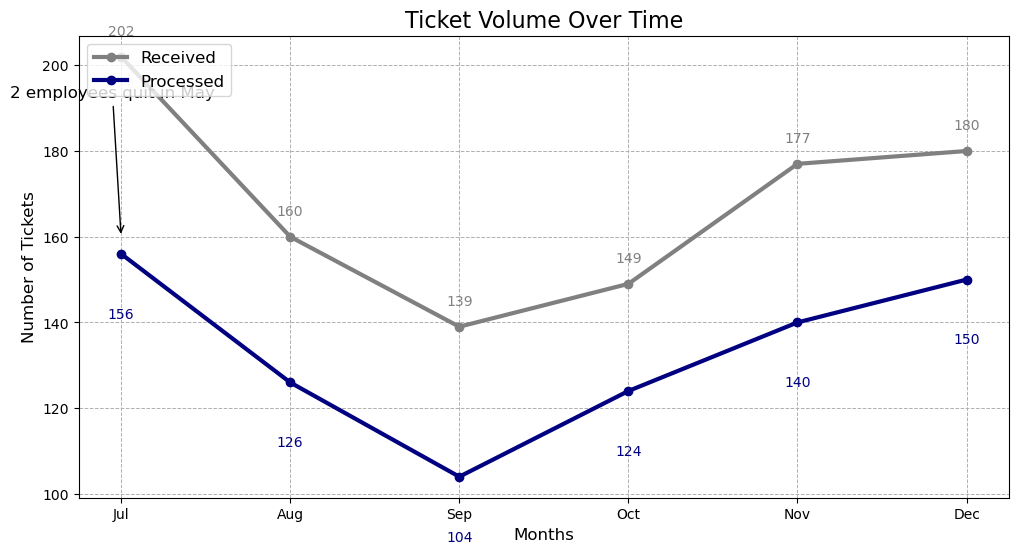

In [3]:
import matplotlib.pyplot as plt

# Correcting the data length mismatch
months = ["Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
received_tickets = [202, 160, 139, 149, 177, 180]
processed_tickets = [156, 126, 104, 124, 140, 150]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(months, received_tickets, label="Received", color='gray', linewidth=3, marker='o')
plt.plot(months, processed_tickets, label="Processed", color='navy', linewidth=3, marker='o')

# Adding annotations for significant points
plt.annotate("2 employees quit in May", xy=("Jul", 160), xytext=(-80, 100),
             textcoords='offset points', fontsize=12, arrowprops=dict(arrowstyle='->'))

# Annotating numbers
for i, (r, p) in enumerate(zip(received_tickets, processed_tickets)):
    plt.text(i, r + 5, str(r), fontsize=10, color='gray', ha='center')
    plt.text(i, p - 15, str(p), fontsize=10, color='navy', ha='center')

# Graph details
plt.title("Ticket Volume Over Time", fontsize=16)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Tickets", fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show plot
plt.show()

FIGURE 5.10 Ticket volume over time